# Feature scaling with sklearn - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size_year.csv'. 

You are expected to create a multiple linear regression (similar to the one in the lecture), using the new data. This exercise is very similar to a previous one. This time, however, **please standardize the data**.

Apart from that, please:
-  Display the intercept and coefficient(s)
-  Find the R-squared and Adjusted R-squared
-  Compare the R-squared and the Adjusted R-squared
-  Compare the R-squared of this regression and the simple linear regression where only 'size' was used
-  Using the model make a prediction about an apartment with size 750 sq.ft. from 2009
-  Find the univariate (or multivariate if you wish - see the article) p-values of the two variables. What can you say about them?
-  Create a summary table with your findings

In this exercise, the dependent variable is 'price', while the independent variables are 'size' and 'year'.

Good luck!

## Import the relevant libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

sns.set_theme()

## Load the data

In [42]:
df = pd.read_csv("data/raw/real_estate_price_size_year.csv")
df.describe()

,price,size,year
count,100.000000,100.000000,100.000000
mean,292289.470160,853.024200,2012.600000
std,77051.727525,297.941951,4.729021
min,154282.128000,479.750000,2006.000000
25%,234280.148000,643.330000,2009.000000
50%,280590.716000,696.405000,2015.000000
75%,335723.696000,1029.322500,2018.000000
max,500681.128000,1842.510000,2018.000000


<Axes: xlabel='size', ylabel='price'>

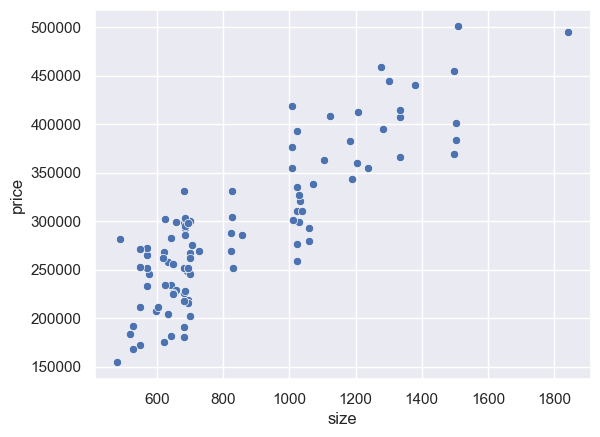

In [43]:
sns.scatterplot(df, x="size", y="price")

## Create the regression

### Declare the dependent and the independent variables

In [44]:
y = df.iloc[:,0]
X = df.iloc[:,1:].values.reshape(-1,2)

### Scale the inputs

In [59]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

### Regression

In [46]:
reg = LinearRegression().fit(X_scaled, y)

### Find the intercept

In [47]:
reg.intercept_

np.float64(292289.4701599997)

### Find the coefficients

In [48]:
reg.coef_

array([67501.57614152, 13724.39708231])

### Calculate the R-squared

In [49]:
reg.score(X_scaled, y)

0.7764803683276793

### Calculate the Adjusted R-squared

$$R^2_{adj.} = 1 - (1-R^2)* \frac{n-1}{n-p-1}$$

In [50]:
n = X_scaled.shape[0]
p = X_scaled.shape[1]
R2 = reg.score(X_scaled, y)
R2_Adj = 1 - (1 - R2) * (n - 1) / (n - p - 1)
R2_Adj

0.77187171612825

### Making predictions

Find the predicted price of an apartment that has a size of 750 sq.ft. from 2009.

In [51]:
new_data = [[750, 2009]]
new_data_scaled = scaler.transform(new_data)
reg.predict(new_data_scaled)

array([258330.34465995])

### Calculate the univariate p-values of the variables

In [52]:
f_regression(X_scaled, y)

(array([285.92105192,   0.85525799]), array([8.12763222e-31, 3.57340758e-01]))

In [53]:
p_values = f_regression(X_scaled, y)[1].round(3)
p_values

array([0.   , 0.357])

### Create a summary table with your findings

In [61]:
summary_table = pd.DataFrame(data=df.iloc[:,1:].columns.values, columns=["Features"])
summary_table["Weight"] = reg.coef_
summary_table["pValue"] = p_values
summary_table

,Features,Weight,pValue
0,size,67501.576142,0.000
1,year,13724.397082,0.357


Answer...